<a href="https://colab.research.google.com/github/victoriadarosa/assignment2/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [ ]:
! git clone https://www.github.com/DS3001/assignment2

fatal: destination path 'assignment2' already exists and is not an empty directory.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
    a. This paper is about the effectiveness of tidy data sets. In tidy data sets, each column is a variable and each row is an observation. This allows tidy data sets to be easy to manipulate, model, and visualize. This structure makes it easier to tidy messy data sets.
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
    b. The tidy data standard is the standard way to organize data values. It is intended to make initial data cleaning easier by facilitating initial exploration and analysis of the data, and simplifying the development of data analysis tools that work well together.
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
    c. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" refers to Leo Tolstoy's quote "Happy families are all alike; every unhappy family is unhappy in its own way." This means, all tidy data sets share the same qualities, however messy data sets have unique qualities that make them messy.
    d. The second sentence means it can be difficult to determine what the variables in the columns are actually measuring. For example, it is easy to determine what the variables height and weight are measuring. However, if you change that to height and width, some people could intepret that as measuring the dimensions of an obejct, and others could not.
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
    e. Values make up the dataset and can be quantitative or qualitative. All values can be either a variable or an observation. A variable is something that contains all values that measure the same underlying attribute across units. This could be height, temperature, duration, etc. An observation contains all values measured on the same unit across attributes. This could be a person, or a day, or a race.
  5. How is "Tidy Data" defined in section 2.3?
    f. Tidy data is defined as a data set where each variable forms a column, each observation forms a row, and each type of observational unit forms a table.
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
    g. The five most common problems with messy data sets are column headers are values, not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables.
    h. It is messy because the column headers are values, not variable names.
    i. Melting a dataset means turning columns into rows.
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
    j. Table 11 had multiple columns to represent the day resulting in many columns being used making it messy. Table 12 is considered tidy because it is able to represent the date in one column.
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?
    k. The "chicken-and-egg" problem states that if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. It is difficult to develop better data storage strategies and better tools without it being a "false start". He hopes in the future, people are able to build on the tidy data framework and keep devloping tools.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns # Import Seaborn

df = pd.read_csv('./assignment2/data/airbnb_hw.csv')
sd = pd.read_csv('./assignment2/data/sharks.csv', low_memory=False)

In [ ]:
var = 'Price'

#df.columns.tolist()
print(df.loc[:, (var)], '\n')
df[var] = df[var].str.replace(",", "")
df[var] = pd.to_numeric(df[var], errors='coerce')
# df[var].unique()
print(df.loc[:, (var)], '\n')

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: object 

0        145
1         37
2         28
3        199
4        549
        ... 
30473    300
30474    125
30475     80
30476     35
30477     80
Name: Price, Length: 30478, dtype: int64 



1. To clean the variable 'Price', I knew I had to change it from an object to an int. To start, I removed the ',' from the larger numbers because it makes it an object. I replaced the ',' with nothing ("") and then converted the variable to an int with pd.to_numeric.

In [ ]:
var = 'Type'

# print(sd.loc[:, (var)], '\n')
sd[var].unique()
sd[var] = sd[var].replace('Boatomg','Boating')
sd[var] = sd[var].replace('Watercraft','Boating')
sd[var] = sd[var].replace('Boat','Boating')
sd[var] = sd[var].replace('Unconfirmed','Unverified')
sd[var].unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'Boating', 'Unverified',
       'Invalid', 'Under investigation', 'Sea Disaster', nan],
      dtype=object)

2. To clean the 'Type' variable, I replaced some columns. I noticed there were some spelling errors, and columns with similar names, so I put those columns together. For example, 'Boatong' was clearly a spelling error so I replaced 'Boatomg' to 'Boating'. I also put similar categories together, so because 'Watercraft' and 'Boat' were close to 'Boating', I replaced those categories to 'Boating'. I did the same thing by replacing 'Unconfirmed' to 'Unverified' because I felt they were expressing the same thing.

In [ ]:
#http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv
#I had to download the data and put it in my files because it would not work via the url
pt = pd.read_csv('./assignment2/data/pretrial.csv', low_memory=False)

In [ ]:
pt = pt.rename(columns = {'WhetherDefendantWasReleasedPretrial':'ReleasedPretrial'})
var = 'ReleasedPretrial'

# print(pt.loc[:, (var)], '\n')
pt[var].unique()
pt[var] = pt[var].replace(9,np.nan)
pt[var+'_nan'] = pt[var].isnull()
print(pt.loc[:, (var)], '\n')
pt[var].unique()

0        NaN
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
22981    1.0
22982    1.0
22983    1.0
22984    1.0
22985    1.0
Name: ReleasedPretrial, Length: 22986, dtype: float64 



array([nan,  0.,  1.])

3. To clean this data, I wanted to remove values that were not 0 or 1, because this variable looks at if a defendant was released pretrail or not, and is represented by 0 or 1. Any other value means it is missing data. The only other value in the variable was 9, so I replaced 9 with np.nan to clean up the data. I then created a new variable, ReleasedPretrial_nan, to represent all the null values that were found. The values were most likely null because the answer did not apply to every defendant.

In [ ]:
pt = pt.rename(columns = {'ImposedSentenceAllChargeInContactEvent':'ContactEvents'})
var = 'ContactEvents'

# print(pt.loc[:, ('SentenceTypeAllChargesAtConvictionInContactEvent')], '\n')
# pt['SentenceTypeAllChargesAtConvictionInContactEvent'].unique()

print(pt.loc[:, (var)], '\n')
# pt[var].unique()
pt[var] = pt[var].replace('',np.nan)
pt[var] = pd.to_numeric(pt[var], errors='coerce')
print(pt.loc[:, (var)], '\n')
# pt[var].unique()

0              NaN
1        60.000000
2        12.000000
3         0.985626
4              NaN
           ...    
22981          NaN
22982          NaN
22983          NaN
22984          NaN
22985          NaN
Name: ContactEvents, Length: 22986, dtype: float64 



4. To clean ImposedSentenceAllChargeInContactEvent, I first changed the variable name to ContactEvents to make it more readable. I then noticed that the variable was listed as an object because it had missing values. I converted those missing values to null and coerced the data to a float by using to_numeric. This allowed me to express the variable as an number and not an object

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [ ]:
df = pd.read_csv('./assignment2/data/airbnb_hw.csv')

df.head()
print(df.shape, '\n')

(30478, 13) 



2. The data has 30478 rows and 13 columns. The variables of the dataset include information about the host (Host ID, Host Since), information about the housing (Name, Property Type, Price, etc.), information on the location of the housing (Neighborhood, Room type, etc.), and reveiws of the Airbnb (Review Scores Rating, Number of Reviews, etc.).


In [ ]:
var1 = 'Room Type'
var2 = 'Property Type'

pd.crosstab(df[var1], df[var2])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


3. When cross tabulating the data, you can see what room types are offered for each property type. You see which Property Types offer a lot of a certain Room Type. You can also see which Property Types offer low amounts of a certain Room Type, or rooms in general. It is most common to rent a private room when the property is a Bed & Breakfast or a House (also most common in Other, but Other could be many types of properties).

<Axes: >

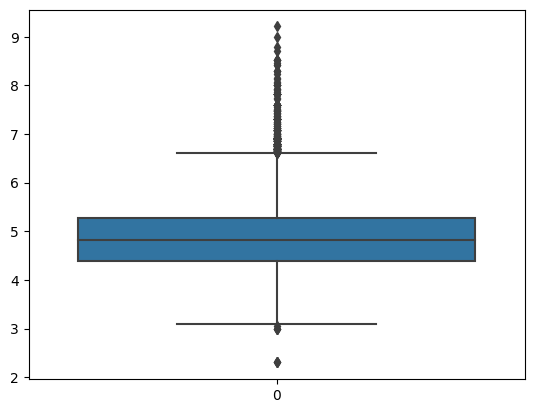

In [ ]:
var = 'Price'
var_log = 'Price_log'

sns.histplot(df[var])
sns.kdeplot(df[var])
sns.boxplot(df[var])

df['Price_log'] = np.log(df['Price'])

sns.histplot(df[var_log])
sns.kdeplot(df[var_log])
sns.boxplot(df[var_log])

4. The graphs with the original 'Price' variable is badly scaled. The histogram and the density plot show that the data is densely populated at the low range of Price. This is a sign of bad scaling. The box plot also shows multiple outliers at high values which explains why the data is densely populated at low Price values. The graphs with var_log variable show a much more even distribution of the data and less outliers.


Beds
0.0       92.000000
1.0      127.673810
2.0      199.061271
3.0      268.118300
4.0      315.332056
5.0      411.500000
6.0      401.768362
7.0      341.377778
8.0      589.041667
9.0      618.000000
10.0     480.187500
11.0     535.800000
12.0    1418.750000
16.0     736.000000
Name: Price, dtype: float64
Beds
0.0       38.183766
1.0      107.047827
2.0      225.706318
3.0      303.106942
4.0      353.184402
5.0      672.610659
6.0      417.018431
7.0      220.116631
8.0      793.054934
9.0      233.649616
10.0     296.820534
11.0     499.217588
12.0    2388.285211
16.0     496.804287
Name: Price, dtype: float64


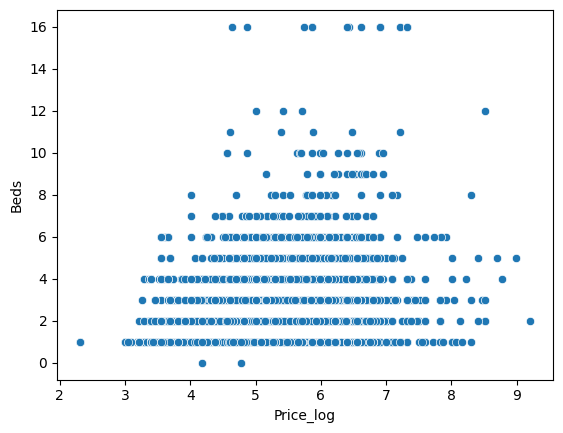

In [ ]:
sns.scatterplot(x=var_log,y='Beds',data=df)

# https://saturncloud.io/blog/how-to-get-the-average-of-a-groupby-with-pandas/#:~:text=To%20get%20the%20average%20of%20a%20groupby%20in%20pandas%2C%20you,numeric%20column%20for%20each%20group.&text=As%20you%20can%20see%2C%20the,average%20sales%20for%20each%20product.
grouped = df.groupby('Beds')['Price']
average_price = grouped.mean()
standard_dev = grouped.std()
print(average_price)
print(standard_dev)

5. From the groupings, we can see generally that when the numbers of beds increases, the average price for the room also increases. There is no linear correlation for the standard deviation. However, both sets of numbers tell us that there is a large outlier for the price of the room when it has 12 beds.




                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

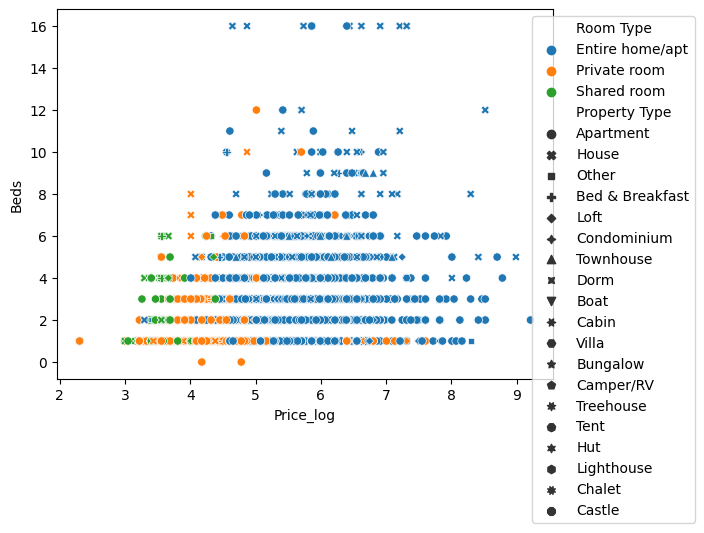

In [ ]:
this_plot = sns.scatterplot(data=df,x=var_log,y='Beds',hue='Room Type', style='Property Type')
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.3, 1))
#https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/
grouped = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(grouped)

6. The graph shows that in general, renting a shared room in cheapest, renting a private room is more expensive, and renting an entire home is most expensive regardless of property type. Renting an entire villa has the highest average, and it also has the highest standard deviation (outside of entire room of other). Because of the high standard deviations, it would be more reliable to use the mean to estimate the central tendency. The high outliers can cause the data to skew higher for only a few values. The mean ignores these high values to show a better representation of central data.

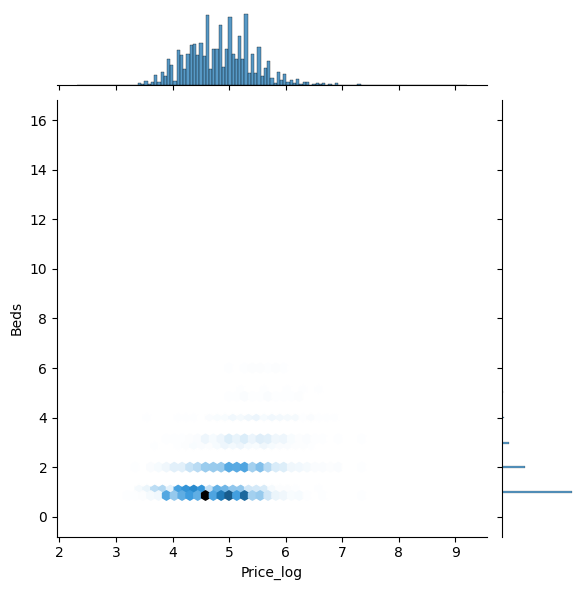

In [ ]:
#https://www.geeksforgeeks.org/python-seaborn-jointplot-method/
sns.jointplot(x=var_log, y='Beds', kind='hex', data=df)

7. The points on the graph show us the where the data is most dense. From this, we can see that most of the data points represent where there are 1 or 2 beds, between the vavlues of 4 and 6 of proce_log. We can also see this in the histograms on the sides of the graphs that the most densely populated numbers are in this region. This affects how I look at the plots of 5 and 6 because most of the data points we were looking for those questions don't represent the majority of the data, rather the outliers of the data.

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.